In [70]:
import requests
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import numpy as np
import csv
import os

In [3]:
locationDictionary={}
categoryDictionary={}
tagsDictionary={}

In [4]:
dateInput=raw_input("Enter a VALID date in MM-DD-YYYY format. Example: 01-31-2018\n")
print(dateInput)
month=int(dateInput.split("-")[0])
date=int(dateInput.split("-")[1])
year=int(dateInput.split("-")[2])
# print(date)
# print(month)
# print(year)

Enter a VALID date in MM-DD-YYYY format. Example: 01-31-2018
08-23-2018
08-23-2018


In [5]:
page = requests.get("https://www.newswire.com/newsroom")    
if page.status_code==200:   
    soup = BeautifulSoup(page.content, 'html.parser') 

In [6]:
def monthToIntMonth(articleMonth):
    switcher = {
            "Jan":1,
            "Feb":2,
            "Mar":3,
            "Apr":4,
            "May":5,
            "Jun":6,
            "Jul":7,
            "Aug":8,
            "Sep":9,
            "Oct":10,
            "Nov":11,
            "Dec":12
        }
    return switcher.get(articleMonth, "Invalid month")

def getSoupArticle(url):
    pageArticle = requests.get(url)    
    if pageArticle.status_code==200:   
        soupArticle = BeautifulSoup(pageArticle.content, 'html.parser')
    else:
        print "Error while parsing the Article Page with URL: "+url  
    return soupArticle

def getArticleData(soupArticle):
    
    locList=soupArticle.select("p strong.date-line.color-pr")[0].get_text().strip().lower().split(",")[:-2]
    location=[]
    for loc in locList:
        loc=loc.lstrip().rstrip()
        location.append(loc)
    for loc in location:     
        if loc in locationDictionary.keys():
            locationDictionary[loc]+=1
        else:
            locationDictionary[loc]=1
        
    catSoup=soupArticle.select("p[class=mb-0]")[0]
    catListLen=len(catSoup.select("a"))
    for i in range(0,catListLen):
        catList=str(catSoup.select("a")[i].get_text().encode('utf-8').lower()).split(",")
        for cat in catList:
            cat=cat.lstrip()
            if cat in categoryDictionary.keys():
                categoryDictionary[cat]+=1
            else:
                categoryDictionary[cat]=1

    
    tagSoup=soupArticle.select("p[class=mb-0]")[1]
    tagListLen=len(tagSoup.select("a"))
    for i in range(0,tagListLen):
        tagList=str(tagSoup.select("a")[i].get_text().encode('utf-8').lower()).split(",")
        for tag in tagList:
            if tag in tagsDictionary.keys():
                tagsDictionary[tag]+=1
            else:
                tagsDictionary[tag]=1

In [7]:
nextPageTraverse=True
while(nextPageTraverse):
    divs=soup.select("div.news-item-body")
    for div in divs:
        p=div.select("time.ln-date")[0]
        articleDate=p.get_text().split(" ")
        articleDay=int(str(articleDate[1]).replace(',',''))
    #     print "Day:", articleDay
        articleMonth=int(monthToIntMonth(str(articleDate[0]).strip()))
    #     print "Month:", articleMonth
        articleYear=int(articleDate[2])
    #     print "Year:", articleYear
        print str(articleMonth) + "/" + str(articleDay) + "/" + str(articleYear)
        if(articleYear>=year):
            if(articleMonth>=month):
                if(articleDay>=date):
                    url="https://www.newswire.com/"+div.select("a.content-link")[0]['href']
                    print url
                    soupArticle=getSoupArticle(url)
                    getArticleData(soupArticle)
                else:
                    nextPageTraverse=False
                    break
            else:
                nextPageTraverse=False
                break
        else:
            nextPageTraverse=False
            break
    nextPage=soup.select("div.chunkination.chunkination-centered ul")[2]
    try:
        nextPage=str(nextPage.find("a")['href'])
        url="https://www.newswire.com/"+nextPage
        page = requests.get(url)    
        if page.status_code==200:   
            soup = BeautifulSoup(page.content, 'html.parser') 
    except:
        print 'No Next Page'
        nextPageTraverse=False
    

print locationDictionary
print "\n\n\n"
print categoryDictionary
print "\n\n\n"
print tagsDictionary

8/26/2018
https://www.newswire.com/news/millennial-mom-jenna-barnett-spotlights-female-founded-brands-in-20614837
8/26/2018
https://www.newswire.com/news/i-accident-lawyer-shares-tips-for-passengers-involved-in-an-uber-20613409
8/25/2018
https://www.newswire.com/news/warning-the-state-of-mexico-about-psychiatric-abuse-20615383
8/25/2018
https://www.newswire.com/news/the-western-way-highlights-leaders-from-across-the-eastern-plains-20614836
8/25/2018
https://www.newswire.com/news/peace-and-culture-gala-is-launching-its-first-edition-20610583
8/25/2018
https://www.newswire.com/news/lottery-apps-smart-numbers-score-big-wins-20614060
8/25/2018
https://www.newswire.com/news/sa-co-proudly-announces-launch-and-expansion-of-new-marketing-division-20615028
8/25/2018
https://www.newswire.com/news/ccr-circle-computer-resources-inc-appears-on-the-inc-5000-for-the-20614790
8/25/2018
https://www.newswire.com/news/infinite-beauty-continues-to-ramp-up-investment-in-beauty-technology-20614692
8/24/2018

8/23/2018
https://www.newswire.com/news/gen-paul-nakasone-and-gchq-director-jeremy-fleming-to-keynote-at-9th-20611484
8/23/2018
https://www.newswire.com/news/geistm-named-fastest-growing-martech-platform-with-three-year-revenue-20612008
8/23/2018
https://www.newswire.com/news/artekal-music-releases-artekalmoji-companion-app-20612069
8/23/2018
https://www.newswire.com/news/periscope-data-experiences-dramatic-growth-in-2018-develops-new-20611717
8/23/2018
https://www.newswire.com/news/collin-granger-named-ceo-and-president-of-mapcom-systems-20611783
8/23/2018
https://www.newswire.com/news/netsertive-named-an-inc-5000-fastest-growing-private-company-for-sixth-20611511
8/23/2018
https://www.newswire.com/news/second-annual-black-restaurant-week-returns-to-atlanta-sept-2-16-2018-20610901
8/23/2018
https://www.newswire.com/news/mediacrossing-recipient-of-2018-marcum-tech-top-40-award-20612116
8/23/2018
https://www.newswire.com/news/seo-brand-discusses-how-online-reputation-management-will-mak

Printing Location Analysis Graph and Table. The plot has also been saved as a LocationAnalysis.png file locally in the CWD: D:\HIGHER STUDIES\Stevens\Job Search\Fall Internship\Indeed\newswire.com\Coding Test


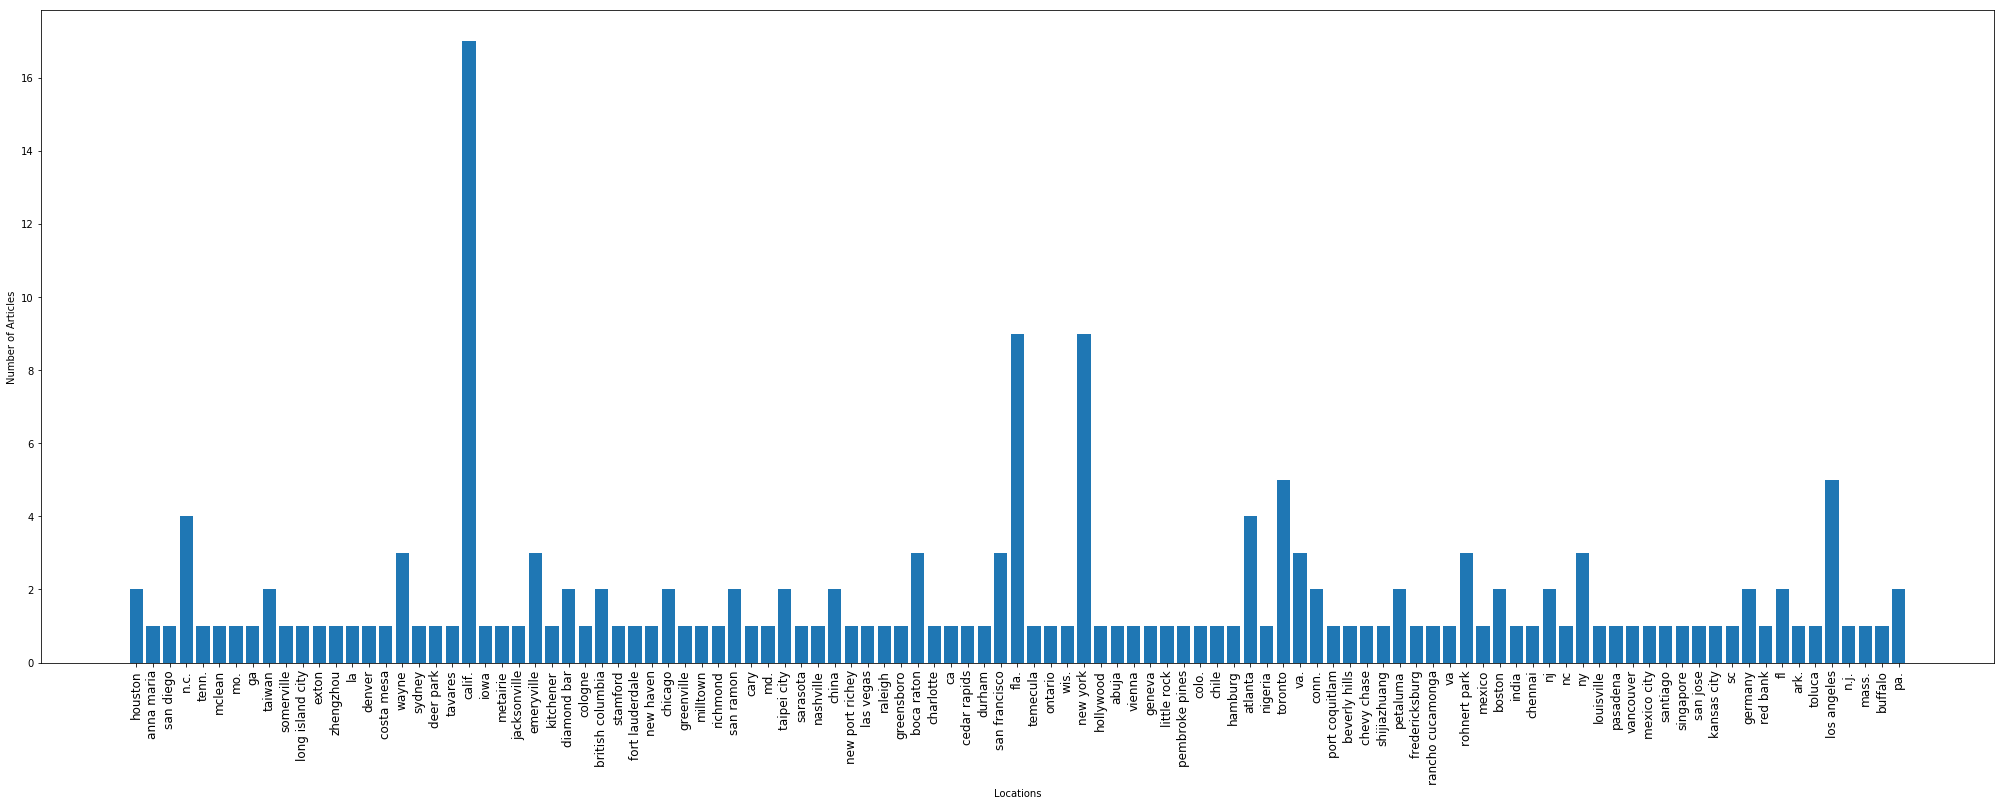

Location                  | Number of Article
------------------------------------------------
houston                   |          2
anna maria                |          1
nc                        |          1
n.c.                      |          4
tenn.                     |          1
mclean                    |          1
mo.                       |          1
ga                        |          1
taiwan                    |          2
somerville                |          1
long island city          |          1
exton                     |          1
zhengzhou                 |          1
la                        |          1
denver                    |          1
costa mesa                |          1
wayne                     |          3
sydney                    |          1
deer park                 |          1
rancho cucamonga          |          1
calif.                    |          17
iowa                      |          1
metairie                  |          1
jackson

In [71]:
print "Printing Location Analysis Graph and Table. The plot has also been saved as a LocationAnalysis.png file \
locally in the CWD: "+os.getcwd()
fig, ax = plt.subplots(figsize=(35,12))
plt.bar(np.arange(len(locationDictionary)), locationDictionary.values(), align='center')
plt.xticks(np.arange(len(locationDictionary)), locationDictionary.keys(),rotation='vertical', fontsize='12')
plt.xlabel('Locations')
plt.ylabel('Number of Articles')
plt.savefig('LocationAnalysis.png')
plt.show()


locDict1={}
maxLen=0
for k,v in locationDictionary.iteritems():
    k=k.encode('ascii','ignore')
    locDict1[k]=v
    if(maxLen<len(k)):
        maxLen=len(k)
    
print "Location"+' '*(maxLen+2)+"| Number of Article"
print '-'*(maxLen+32)
for k,v in locDict1.iteritems():
    print k+' '*(maxLen-len(k)+10)+"|"+' '*10+str(v)

Printing Category Analysis Graph and Table. The plot has also been saved as a CategoryAnalysis.png file locally in the CWD: D:\HIGHER STUDIES\Stevens\Job Search\Fall Internship\Indeed\newswire.com\Coding Test


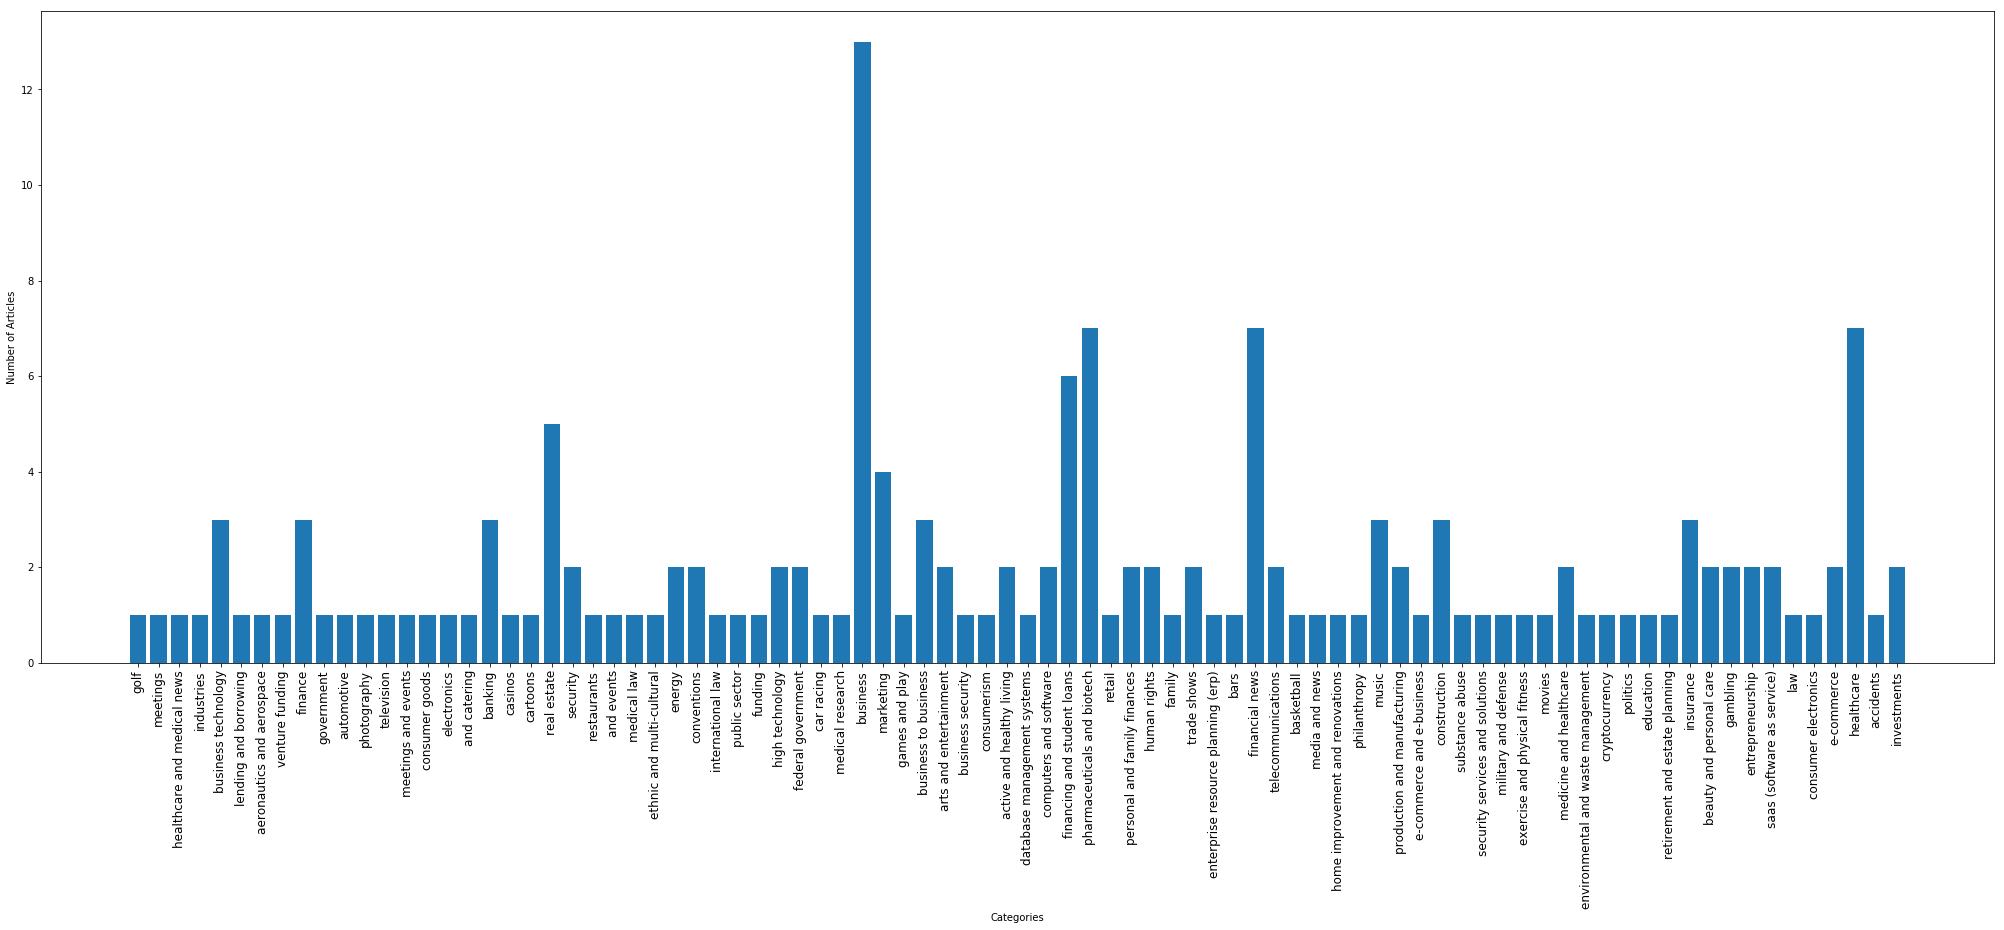

Category                                    | Number of Article
------------------------------------------------------------------
golf                                        |          1
meetings                                    |          1
healthcare and medical news                 |          1
industries                                  |          1
business technology                         |          3
lending and borrowing                       |          1
aeronautics and aerospace                   |          1
venture funding                             |          1
finance                                     |          3
government                                  |          1
automotive                                  |          1
photography                                 |          1
television                                  |          1
meetings and events                         |          1
consumer goods                              |          1
electronics   

In [72]:
print "Printing Category Analysis Graph and Table. The plot has also been saved as a CategoryAnalysis.png file \
locally in the CWD: "+os.getcwd()

fig, ax = plt.subplots(figsize=(35,12))
plt.bar(np.arange(len(categoryDictionary)), categoryDictionary.values(), align='center')
plt.xticks(np.arange(len(categoryDictionary)), categoryDictionary.keys(),rotation='vertical', fontsize='12')
plt.xlabel('Categories')
plt.ylabel('Number of Articles')
plt.savefig('CategoryAnalysis.png')
plt.show()

maxLen=0
for k,v in categoryDictionary.iteritems():
#     k=k.encode('ascii','ignore')
#     locDict1[k]=v
    if(maxLen<len(k)):
        maxLen=len(k)

print "Category"+' '*(maxLen+2)+"| Number of Article"
print '-'*(maxLen+32)
for k,v in categoryDictionary.iteritems():
    print k+' '*(maxLen-len(k)+10)+"|"+' '*10+str(v)

In [78]:
print "The Tags are mostly unique for each article and thus plotting a bar graph wouldn't be feasible/readble.\
We thus only have a table for the same\n\n"

maxLen=0
for k,v in tagsDictionary.iteritems():
    if(maxLen<len(k)):
        maxLen=len(k)

print "Tags"+' '*(maxLen+6)+"| Number of Article"
print '-'*(maxLen+32)
for k,v in tagsDictionary.iteritems():
    print k+' '*(maxLen-len(k)+10)+"|"+' '*10+str(v)

The Tags are mostly unique for each article and thus plotting a bar graph wouldn't be feasible/readble.We thus only have a table for the same


Tags                                                    | Number of Article
------------------------------------------------------------------------------
citizens commission on human rights                     |          1
expungement                                             |          1
saas                                                    |          2
oss                                                     |          1
pasadena villa                                          |          1
weight loss                                             |          1
home gym flooring                                       |          1
kexin                                                   |          1
application performance management                      |          1
financial goals                                         |          1
custom pcb 